# 1.1 Overview of Time Series Characteristics

In [6]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

In [2]:
df = pd.read_csv('data/Annual_Surface_Temperature_Change.csv', index_col='Country')
df.head()

,ObjectId,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1,AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,2,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,3,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,4,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",5,AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [3]:
data = df[df.columns.to_list()[9:]]
data.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
data.columns = np.arange(1961, 2023)
data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


<AxesSubplot:>

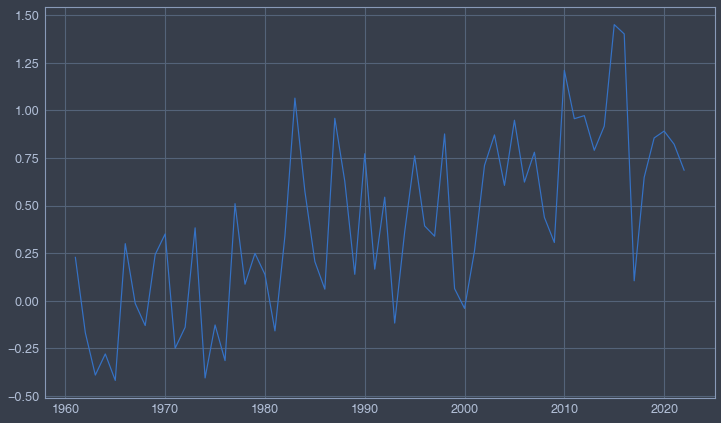

In [29]:
data.loc['Zambia'].plot()

In [48]:
data_acf = acf(data.loc['Zambia'], nlags=61, fft=True)
pd_data = [data.loc['Zambia'].autocorr(i) for i in range(1, 62)]

f:\python\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
f:\python\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
zambia = data.loc['Zambia'].reset_index()
zambia.drop('index', axis=1, inplace=True)

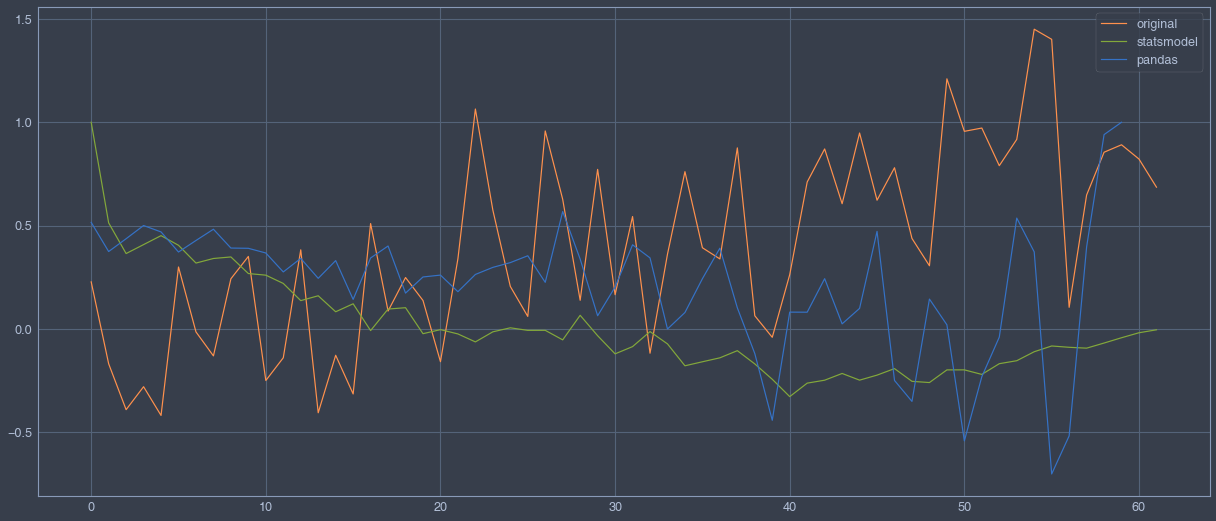

In [50]:
fig, ax = plt.subplots(1, figsize=(21, 9))

ax.plot(zambia, c='y', label='original')
ax.plot(data_acf, c='g', label='statsmodel')
ax.plot(pd_data, c='b', label='pandas')

ax.legend()